In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. the drift diffusion model for perceptual decision making

In [68]:
Ia = 0.95
Ib = 1
sigma = 7
mu = 20

xinit = 0
dt = 0.1
timesteps = 10000

In [46]:
def drift_diffusion(dec_var, input_a, input_b, sigma, mu, timestep=timesteps, dt=dt):
    vals = np.array([])

    vals = np.append(vals, dec_var)

    for i in range(1, timestep):
        vals = np.append(vals, vals[i-1] + ((input_a - input_b) + (sigma * np.random.normal())) * dt)

        if vals[i] >= mu:
            break
        elif vals[i] <= -mu:
            break

    return vals

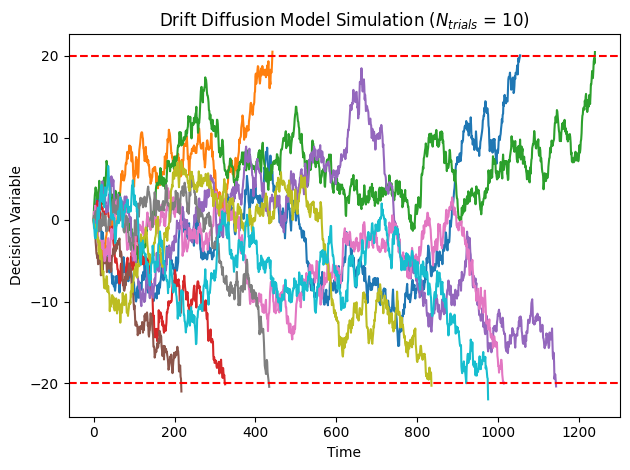

In [70]:
np.random.seed(42)

trials = 10

fig, ax = plt.subplots()
for i in range(trials):
    ax.plot(drift_diffusion(xinit, Ia, Ib, sigma, mu, timesteps))
ax.axhline(y=mu, color='r', linestyle='--')
ax.axhline(y=-mu, color='r', linestyle='--')
ax.set_title("Drift Diffusion Model Simulation ($N_{trials}$ = 10)")
ax.set_xlabel("Time")
ax.set_ylabel("Decision Variable")
fig.tight_layout()
fig.savefig("ddm_simulation.png")

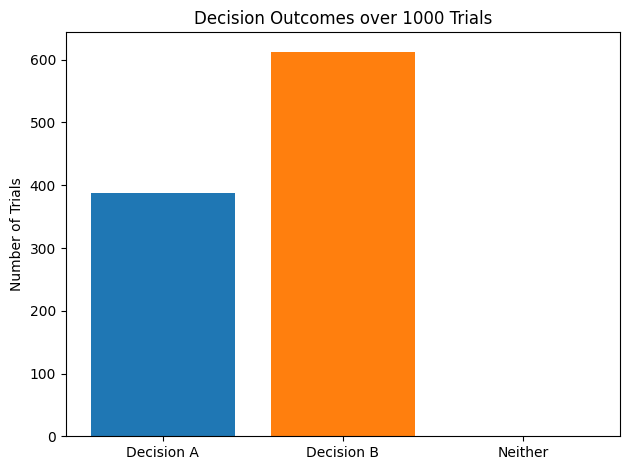

In [69]:
np.random.seed(42)
trials = 1000
outcomes = np.array([])

for i in range(trials):
    run = drift_diffusion(xinit, Ia, Ib, sigma, mu, timesteps)

    outcomes = np.append(outcomes, run[-1])

decision_A = np.where(outcomes >= mu, 1, 0).sum()
decsion_B = np.where(outcomes <= -mu, 1, 0).sum()
neither = trials - decision_A - decsion_B
sanity_check = decision_A + decsion_B + neither

fig, ax = plt.subplots()
ax.bar(['Decision A'], [decision_A])
ax.bar(['Decision B'], [decsion_B])
ax.bar(['Neither'], [neither])
ax.set_ylabel("Number of Trials")
ax.set_title("Decision Outcomes over 1000 Trials")
fig.tight_layout()
fig.savefig("ddm_outcomes.png")

## 2.3 Varying the parameters

### varying $\mu$

In [71]:
I_A = 0.95
I_B = 1
sigma = 7

In [72]:
results_A_mus = []
results_B_mus = []

mus = np.arange(1, 101, 1)

for val in mus:
    outcomes_mus = np.array([])
    A_mus = 0
    B_mus = 0
    for j in range(100):

        run = drift_diffusion(xinit, I_A, I_B, sigma, val, timesteps)

        outcomes_mus = np.append(outcomes_mus, run[-1])

    A_mus += np.where(outcomes_mus >= val, 1, 0).sum()
    B_mus += np.where(outcomes_mus <= -val, 1, 0).sum()
    
    results_A_mus.append(A_mus)
    results_B_mus.append(B_mus)


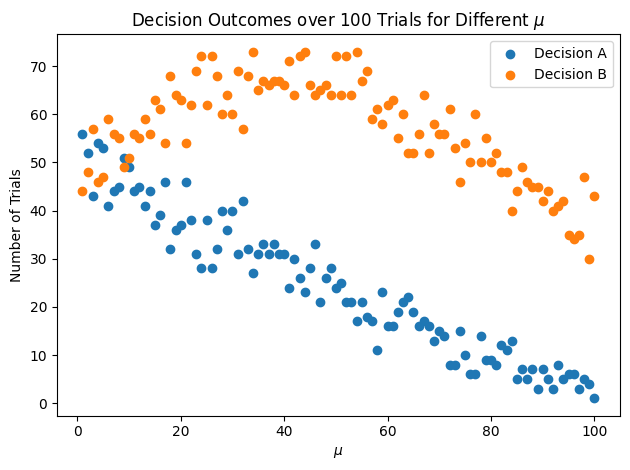

In [78]:
fig, ax = plt.subplots()
ax.scatter(mus, results_A_mus, label = "Decision A")
ax.scatter(mus, results_B_mus, label = "Decision B")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel("Number of Trials")
ax.set_title(r"Decision Outcomes over 100 Trials for Different $\mu$")
ax.legend()
fig.tight_layout()
fig.savefig("ddm_mus.png")

In [80]:
sigmas = np.arange(0, 51, 1)

results_A_sigmas = []
results_B_sigmas = []

for sig in sigmas:
    
    outcomes_sigmas = np.array([])
    
    A_sigmas = 0
    B_sigmas = 0
    
    for j in range(100):

        run_sigmas = drift_diffusion(xinit, I_A, I_B, sig, mu, timesteps)

        outcomes_sigmas = np.append(outcomes_sigmas, run_sigmas[-1])

    A_sigmas += np.where(outcomes_sigmas >= mu, 1, 0).sum()
    B_sigmas += np.where(outcomes_sigmas <= -mu, 1, 0).sum()
    
    results_A_sigmas.append(A_sigmas)
    results_B_sigmas.append(B_sigmas)
    

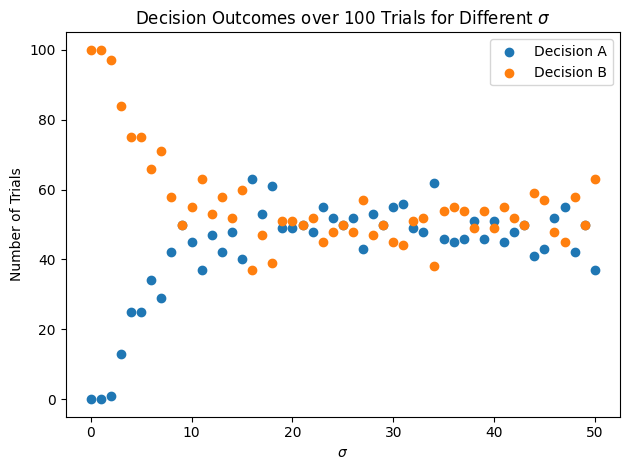

In [82]:
fig, ax = plt.subplots()
ax.scatter(sigmas, results_A_sigmas, label = "Decision A")
ax.scatter(sigmas, results_B_sigmas, label = "Decision B")
ax.set_xlabel(r"$\sigma$")
ax.set_ylabel("Number of Trials")
ax.set_title(r"Decision Outcomes over 100 Trials for Different $\sigma$")
ax.legend()
fig.tight_layout()
fig.savefig("ddm_sigmas.png")


Varying $E$

In [83]:
Ias = np.arange(0.5, 1, 0.01)
Ibs = np.arange(1.0, 0.5, -0.01)
E = list(zip(Ias, Ibs))
difs = [i[0] - i[1] for i in E]
sigma = 7
mu = 20

In [84]:
results_A_Es = []
results_B_Es = []


for i, j in enumerate(E):
    
    outcomes_Es = np.array([])
    A_Es = 0
    B_Es = 0

    for k in range(100):

        run_Es = drift_diffusion(xinit, j[0], j[1], sigma, mu, timesteps)

        outcomes_Es = np.append(outcomes_Es, run_Es[-1])

    A_Es += np.where(outcomes_Es >= mu, 1, 0).sum()
    B_Es += np.where(outcomes_Es <= -mu, 1, 0).sum()
    
    results_A_Es.append(A_Es)
    results_B_Es.append(B_Es)

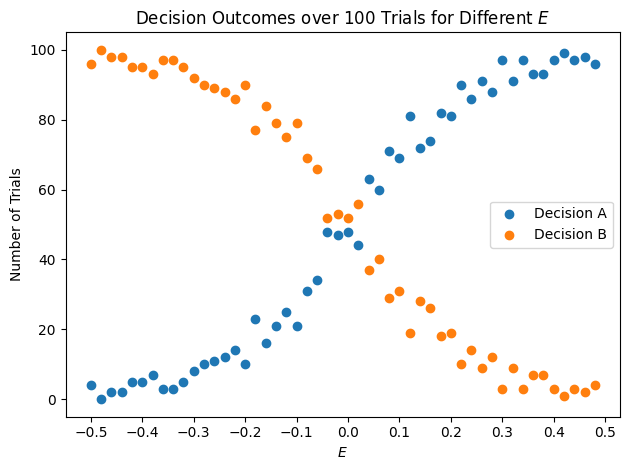

In [88]:
fig, ax = plt.subplots()
ax.scatter(difs, results_A_Es, label = "Decision A")
ax.scatter(difs, results_B_Es, label = "Decision B")
ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
ax.set_xlabel("$E$")
ax.set_ylabel("Number of Trials")
ax.set_title("Decision Outcomes over 100 Trials for Different $E$")
ax.legend()
fig.tight_layout()
fig.savefig('ddm_E.png')


## 1.4 Reaction times distribution

In [89]:
Ib = 1
sigma = 7
mu = 20
Ia_s = [1, 1.01, 1.05]

simulate the dynamics for different Es

In [90]:
reaction_times = {}

for val in Ia_s:
    reaction_times[val] = {'A': np.array([]), 'B': np.array([])}
     
    for _ in range(1000):
        run = drift_diffusion(xinit, val, Ib, sigma, mu)

        if run[-1] >= mu:
            reaction_times[val]['A'] = np.append(reaction_times[val]['A'], len(run))
        elif run[-1] <= -mu:
            reaction_times[val]['B'] = np.append(reaction_times[val]['B'], len(run))

    

/Users/ciprian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ciprian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ciprian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ciprian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1

Text(0.5, 0.04, 'Reaction Time')

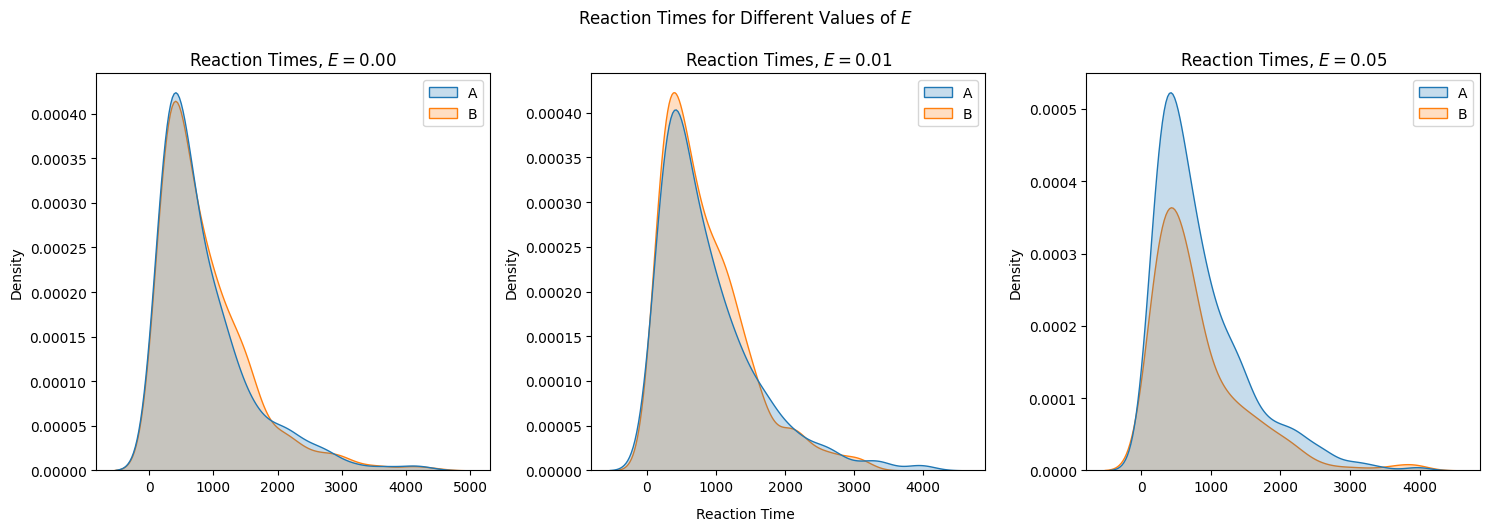

In [115]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.kdeplot(data=reaction_times[1.00], fill=True, ax=axs[0])
axs[0].set_title('Reaction Times, $E = 0.00$')
sns.kdeplot(data=reaction_times[1.01], fill=True, ax=axs[1])
axs[1].set_title('Reaction Times, $E = 0.01$')
sns.kdeplot(data=reaction_times[1.05], fill=True, ax=axs[2])
axs[2].set_title('Reaction Times, $E = 0.05$')

fig.tight_layout(rect=[0, 0.05, 1, 1])
fig.suptitle("Reaction Times for Different Values of $E$", y=1.05)
fig.text(0.5, 0.04, 'Reaction Time', ha='center', va='center')